<a href="https://colab.research.google.com/github/jnielsonresearch/machine-learning-templates/blob/master/Regression_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression ML Models

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [34]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [35]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


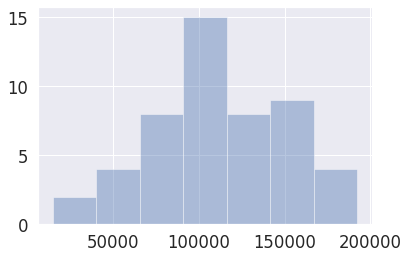

In [31]:
# Distribution plot of dependent variable y 
sns.distplot(y ,kde = False)
plt.show()

## Pairplot and Covariance Matrix of Numerical Variables

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


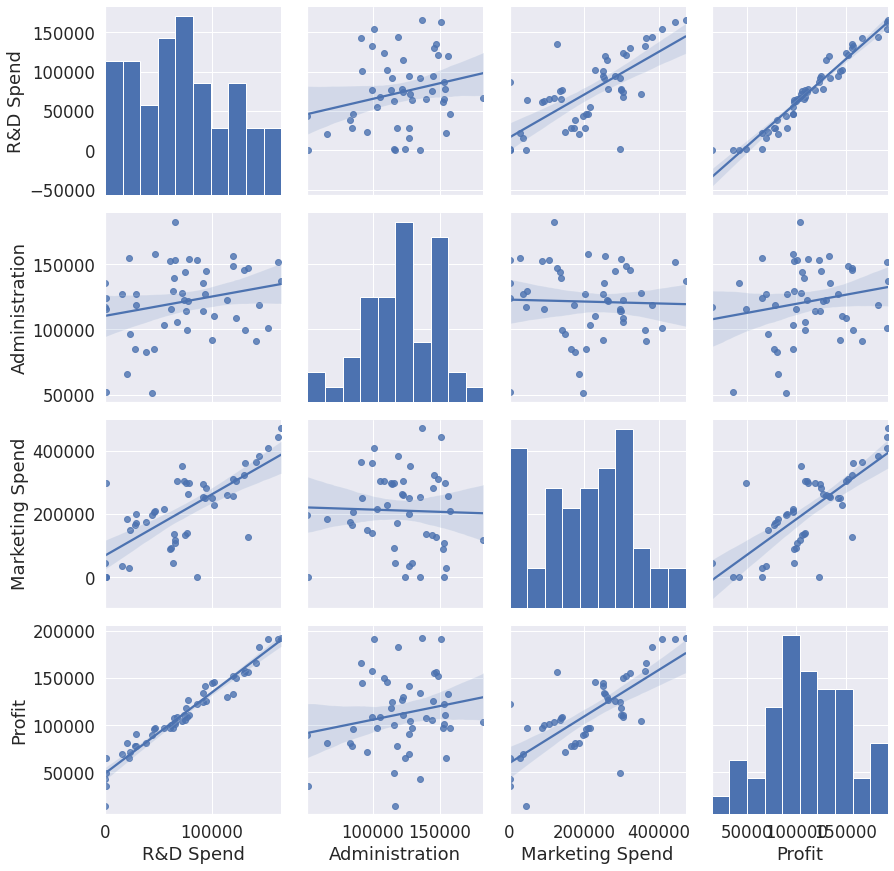

In [37]:
num_cols = dataset.select_dtypes('number').columns
sns.pairplot(dataset[num_cols], size=3.0, kind='reg')

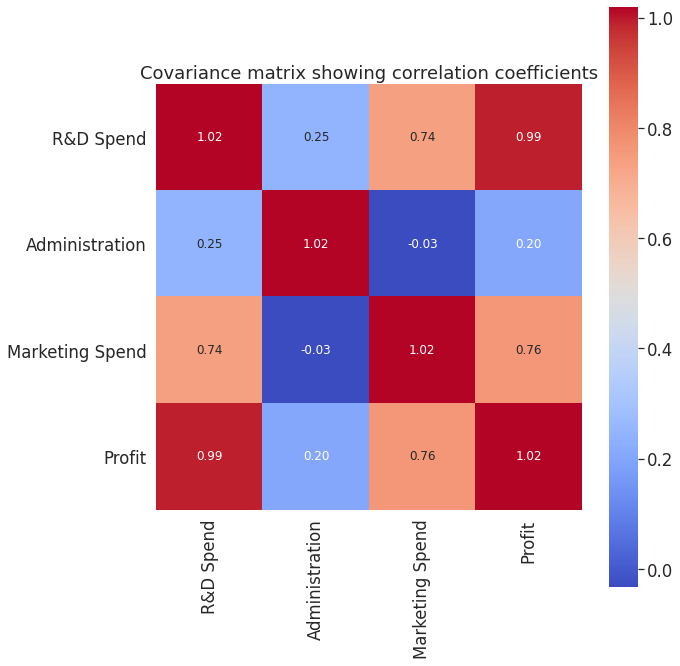

In [39]:
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(dataset[num_cols])
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=num_cols,
                 xticklabels=num_cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

## Encoding categorical data

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [41]:
X[0:5]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

## Splitting the dataset into the Training set and Test set

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Evaluation of Linear Regression Model on Training and Test sets

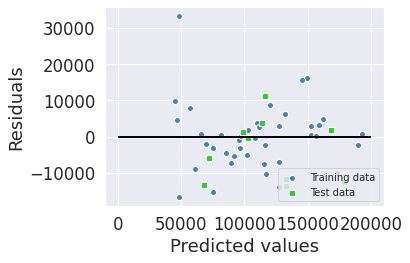

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=200000, color='black', lw=2)
plt.tight_layout()
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

In [18]:
# Regression Intercept and Coefficients

print('Regression Intercept: {}'.format(round(mlr.fit(X_train, y_train).intercept_,2)))
print('Regression Coefficients: {}'.format(np.round(mlr.fit(X_train, y_train).coef_,2)))

Regression Intercept: 452.84
Regression Coefficients: [-1.97 -0.24  0.06 -0.16]


In [19]:
# MSE, RMSE, and R2 Score on Regression Model
from sklearn.metrics import mean_squared_error
mse_mlr = mean_squared_error(y_test, y_test_pred)
print(mlr)
print("MSE on test data : %f" % mse_mlr)
print("RMSE on test data : %f" % mse_mlr**0.5)

from sklearn.metrics import r2_score
r2_score_mlr = r2_score(y_test, y_test_pred)
coef = mlr.coef_
print("r^2 on test data : %f" % r2_score_mlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MSE on test data : 19.733699
RMSE on test data : 4.442263
r^2 on test data : 0.932532


## Lasso, Ridge, and ElasticNet regularization methods 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.932530
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
r^2 on test data : 0.932530
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.932521


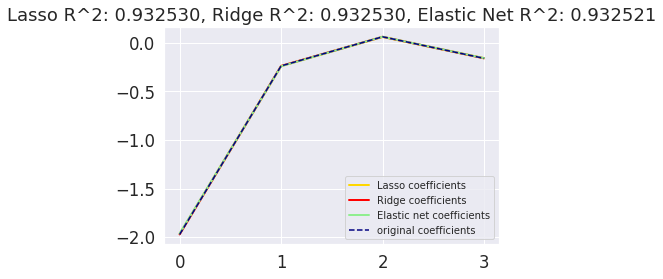

In [20]:
# Lasso - L1 regularization
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# Ridge - L2 regularization
from sklearn.linear_model import Ridge

alpha = 0.1
ridge = Ridge(alpha=alpha)

y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_lasso)
print(ridge)
print("r^2 on test data : %f" % r2_score_lasso)

# ElasticNet - L1 & L2 combined regularization 
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(ridge.coef_, color='red', linewidth=2,
         label='Ridge coefficients')
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.title("Lasso R^2: %f, Ridge R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_ridge, r2_score_enet))
plt.legend(loc='lower right',prop={'size': 10})
plt.show()

# Feaure scaling using StandardScaler, feature selection using PCA and cross-validation using the Pipeline estimator

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.18 %
Standard Deviation: 0.60 %


In [28]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', 
                  PCA(n_components=3)),('slr', LinearRegression())])
sc_y = StandardScaler()
train_score = []
test_score =  []

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10)
print("R^2: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

R^2: 89.18 %
Standard Deviation: 0.60 %


## Support Vector Machine Regression Model using GridSearchCV for best parameters

In [ ]:
# SVM Pipeline and GridSearchCV

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
              
svr = GridSearchCV(estimator = SVR(),
                   param_grid = parameters,
                   cv = 10,
                   n_jobs = -1)

pipe_svr = Pipeline([('scl', StandardScaler()),('svr', svr)])

sc_y = StandardScaler()
train_score = []
test_score =  []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, 
                                     np.newaxis]).flatten()
    pipe_svr.fit(X_train, y_train_std)
    y_train_pred = sc_y.inverse_transform(pipe_svr.predict(X_train))
    y_test_pred = sc_y.inverse_transform(pipe_svr.predict(X_test))
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

In [ ]:
train_score

array([0.94639025, 0.94099466, 0.9365737 , 0.94355126, 0.95589773,
       0.94306312, 0.96109356, 0.95427017, 0.9676977 , 0.95166881])

In [ ]:
print('Training set R2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

Training set R2 score range: 0.950 +/- 0.009


In [ ]:
test_score

array([0.92090227, 0.94435722, 0.97430767, 0.94930131, 0.91793386,
       0.967362  , 0.91902419, 0.90895152, 0.90038763, 0.92186167])

In [ ]:
print('Test set R2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

Test set R2 score range: 0.932 +/- 0.024


## Random Forest Regression Model

In [ ]:
# Random Forest Pipeline

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

pipe_rf = Pipeline([('scl', StandardScaler()),('rf', rf)])

sc_y = StandardScaler()
train_score = []
test_score =  []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                  test_size=0.2, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, 
                                     np.newaxis]).flatten()
    pipe_rf.fit(X_train, y_train_std)
    y_train_pred = sc_y.inverse_transform(pipe_rf.predict(X_train))
    y_test_pred = sc_y.inverse_transform(pipe_rf.predict(X_test))
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

In [ ]:
train_score

array([0.98084924, 0.97966022, 0.98295115, 0.98620114, 0.98357423,
       0.98659131, 0.98356119, 0.98353305, 0.9827157 , 0.99099546])

In [ ]:
print('Training set R2 score range: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))

Training set R2 score range: 0.984 +/- 0.003


In [ ]:
test_score

array([0.97239796, 0.94014104, 0.97250207, 0.93209142, 0.96647139,
       0.94083696, 0.90703151, 0.96286188, 0.85406898, 0.90680451])

In [ ]:
print('Test set R2 score range: %.3f +/- %.3f' % (np.mean(test_score), np.std(test_score)))

Test set R2 score range: 0.936 +/- 0.036
